## Lets get started..
**Import relevent libraries and check Python version**
We have tested with Python Version: 3.6.3


In [2]:
%matplotlib inline

from Resources import helpers
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import pysal as ps
import geopandas as gpd
# You may need palettable: pip install palettable
from osgeo import ogr #dont use pip, but instead 'conda install gdal'
from pylab import *
import sys
import platform
import zipfile
import os
from datetime import datetime
print(sys.version_info)
print("Python Version: " + str(platform.python_version()))

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)
Python Version: 3.6.3


**Lets unzip the data!**

In [3]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in '%s': %s" % (cwd, files))

Files in '/Users/bryder/polybox/PhD/Workshop/Spatial-Workshop': ['.DS_Store', 'Tutorial-Master.ipynb', 'Resources', 'Tutorial-Skeleton.ipynb', 'README.md', '.gitattributes', '.ipynb_checkpoints', '.git', 'Data', 'Spatial-Data.zip']


In [4]:
with zipfile.ZipFile("./Spatial-Data.zip","r") as zip_ref:
    zip_ref.extractall()

**Set some useful parameters**

In [5]:
# Some useful parameters that we don't need to set later
params = {'legend.fontsize': 20}
plt.rcParams.update(params)
tfs = 20

**And lets define some useful functions which are need later**

In [6]:
# plotNeighborGraph: Plot maps wiith neighbor links
def plotNeighborGraph(title, grouping):
    f, ax = plt.subplots(1, figsize=(20, 20))
    dataset.plot(ax=ax, linewidth=0.5, color='white', edgecolor='black')
    plt.plot(centroids[:,0], centroids[:,1],'.')
    for k,neighs in grouping.neighbors.items():
        origin = centroids[k]
        for neigh in neighs:
            segment = centroids[[k,neigh]]
            plt.plot(segment[:,0], segment[:,1], '-')
    plt.title(title, fontsize=tfs)
    ax.set_axis_off()
    show()
    
# analyse_and_transform_wrapper: analyse_and_transform normalises variables with BoxCox
# this function wraps around to use with multiple values  
def analyse_and_transform_wrapper(names,data):
    for n in names:
        data[n] = helpers.analyse_and_transform(data[n])
    return data

## Data
**We need to import the data that we're using - this should be included in the git project**

In [7]:
shp_link = "./Data/nyc_census_tract_features_v3_export.shp"
dataset = gpd.read_file(shp_link)


# Interested in the full list of variables? Uncomment and run the command below
dataset.columns.tolist()

['geom_id',
 'id',
 'county',
 'tract',
 'geom_gps',
 'locations_',
 'incidents_',
 'incident_1',
 'larcenies_',
 'robberies_',
 'burglaries',
 'assaults_2',
 'vehicles_2',
 'murders_20',
 'rapes_2011',
 'incident_2',
 'incident_3',
 'larcenie_1',
 'robberie_1',
 'burglari_1',
 'assaults_1',
 'vehicles_1',
 'murders__1',
 'rapes_20_1',
 'incident_4',
 'incident_5',
 'larcenie_2',
 'robberie_2',
 'burglari_2',
 'assaults_3',
 'vehicles_3',
 'murders__2',
 'rapes_20_2',
 'area',
 'logrecno',
 'population',
 'total_popu',
 'male_popul',
 'male_fract',
 'male_15_34',
 'male_15__1',
 'avg_age',
 'male_avg_a',
 'female_avg',
 'i_mb17',
 'i_m18_34',
 'i_m35_64',
 'i_mo65',
 'i_fb17',
 'i_f18_34',
 'i_f35_64',
 'i_fo65',
 'age_index',
 'black_popu',
 'black_frac',
 'asian_popu',
 'asian_frac',
 'hispanic_p',
 'hispanic_f',
 'i_white',
 'i_black',
 'i_asian',
 'i_other',
 'i_hispanic',
 'racial_eth',
 'total_hous',
 'housing_de',
 'vacant_hou',
 'vacant_fra',
 'rented_hou',
 'rented_fra',
 'avg

**Lets see what area this data looks like!**

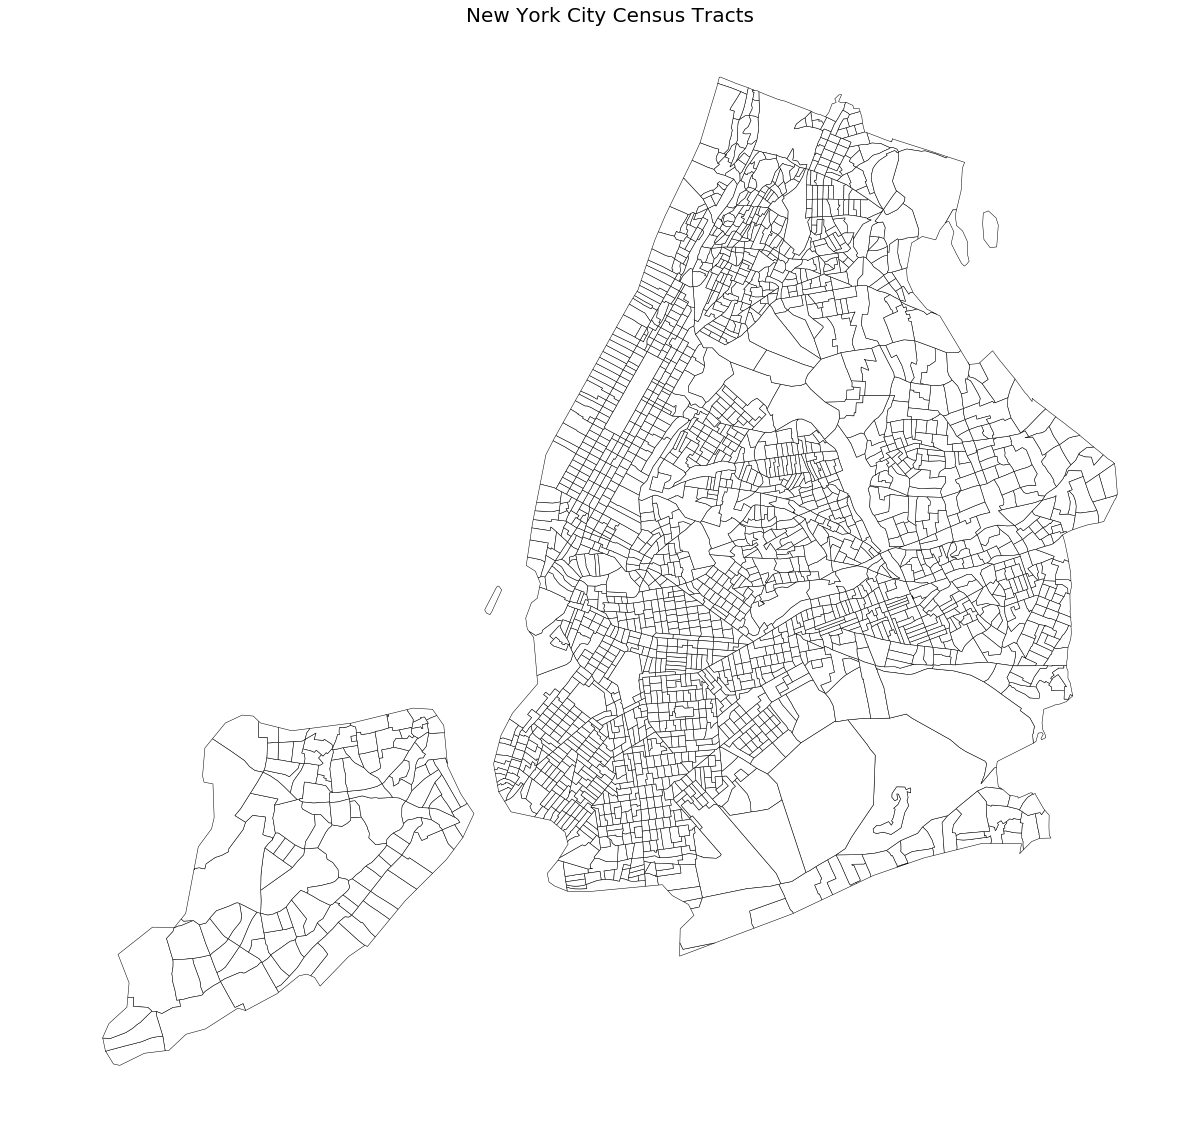

In [8]:
f, ax = plt.subplots(1, figsize=(20, 20))
dataset.plot(ax=ax, linewidth=0.5, color='white', edgecolor='black')
plt.title('New York City Census Tracts', fontsize=tfs)
ax.set_axis_off()
plt.show()

**Let's also generate the central points for each of these census tracts...**

In [10]:
dataframe =  ps.pdio.read_files(shp_link)
centroids = np.array([list(poly.centroid) for poly in dataframe.geometry])
dataframe

geom_id    id  county   tract  \
0        2120  2679      47   21700   
1        3162  3572      81    2500   
2          95  2412       5   34400   
3        1938  2605      47   13600   
4        3290  3644      81   12000   
5        3664  3348      61    8100   
6        2681  3185      47   97000   
7        2446  3083      47   75000   
8        3777  3412      61   14401   
9        1343  2352       5   25200   
10       2119  2678      47   21600   
11       3565  3958      81   60000   
12       2247  2984      47   55400   
13       2642  3233      47  115200   
14       1117  2226       5    8900   
15       3626  4153      81  116100   
16        781  4072      81   84500   
17       2343  3038      47   64400   
18       3170  3583      81    3900   
19        718  3737      81   25301   
20       2630  3218      47  111600   
21       3873  3450      61   17402   
22        305  2740      47   28100   
23       3276  3626      81   10100   
24       1983  2879      47   43200   
25       3551  3319      61    5200   
26       2035  2646      47   18200   
27        764  3986      81   63500   
28        680  3569      81    2000   
29       3634  4163      81  119300   
...       ...   ...     ...     ...   
2137       75  2326       5   22902   
2138     1395  2423       5   36400   
2139       18  2178       5    2701   
2140     3259  3604      81    6501   
2141     2426  2537      47    4600   
2142     3914  4191      81  137700   
2143     2243  2979      47   54900   
2144     3554  3323      61    5600   
2145     3615  3766      81   28200   
2146     2244  2980      47   55000   
2147     2129  2691      47   23100   
2148     1397  2425       5   36502   
2149     4749  4237      85    2700   
2150     1734  2745      47   28502   
2151      162  2650      47   18600   
2152      542  3362      61    9400   
2153     4699  3263      47  121400   
2154     1329  2335       5   23702   
2155     1876  2805      47   35601   
2156       62  2267       5   16400   
2157     2685  3191      47   99000   
2158       61  2265       5   16200   
2159     3264  3610      81    7700   
2160      370  3025      47   61003   
2161      286  3268      47  990100   
2162     3755  3379      61   11201   
2163      556  3415      61   14601   
2164     1029  2185       5    3800   
2165     2651  3245      47  117601   
2166      829  4253      85    8900   

                                               geom_gps  locations_  \
0     SRID=4326;MULTIPOLYGON(((-73.957802 40.674398,...        31.0   
1     SRID=4326;MULTIPOLYGON(((-73.945234 40.75307,-...        30.0   
2     SRID=4326;MULTIPOLYGON(((-73.85603 40.871233,-...        42.0   
3     SRID=4326;MULTIPOLYGON(((-74.019632 40.624879,...        46.0   
4     SRID=4326;MULTIPOLYGON(((-73.828874 40.693828,...        48.0   
5     SRID=4326;MULTIPOLYGON(((-74.001555 40.74108,-...        41.0   
6     SRID=4326;MULTIPOLYGON(((-73.906372 40.648779,...        43.0   
7     SRID=4326;MULTIPOLYGON(((-73.948346 40.624174,...        36.0   
8     SRID=4326;MULTIPOLYGON(((-73.947122 40.775929,...        22.0   
9     SRID=4326;MULTIPOLYGON(((-73.854615 40.844565,...        50.0   
10    SRID=4326;MULTIPOLYGON(((-74.003388 40.634538,...        38.0   
11    SRID=4326;MULTIPOLYGON(((-73.734031 40.693227,...        32.0   
12    SRID=4326;MULTIPOLYGON(((-73.961966 40.607843,...        42.0   
13    SRID=4326;MULTIPOLYGON(((-73.89186 40.675091,-...        66.0   
14    SRID=4326;MULTIPOLYGON(((-73.893895 40.81986,-...        37.0   
15    SRID=4326;MULTIPOLYGON(((-73.823727 40.765826,...        43.0   
16    SRID=4326;MULTIPOLYGON(((-73.815373 40.747218,...        48.0   
17    SRID=4326;MULTIPOLYGON(((-73.939683 40.612782,...        43.0   
18    SRID=4326;MULTIPOLYGON(((-73.940796 40.761391,...        34.0   
19    SRID=4326;MULTIPOLYGON(((-73.918014 40.746568,...        50.0   
20    SRID=4326;MULTIPOLYGON(((-73.870617 40.665095,...       121.0   
21    SRID=4326;MULTIPOLY

**... And display these on the same map as before**

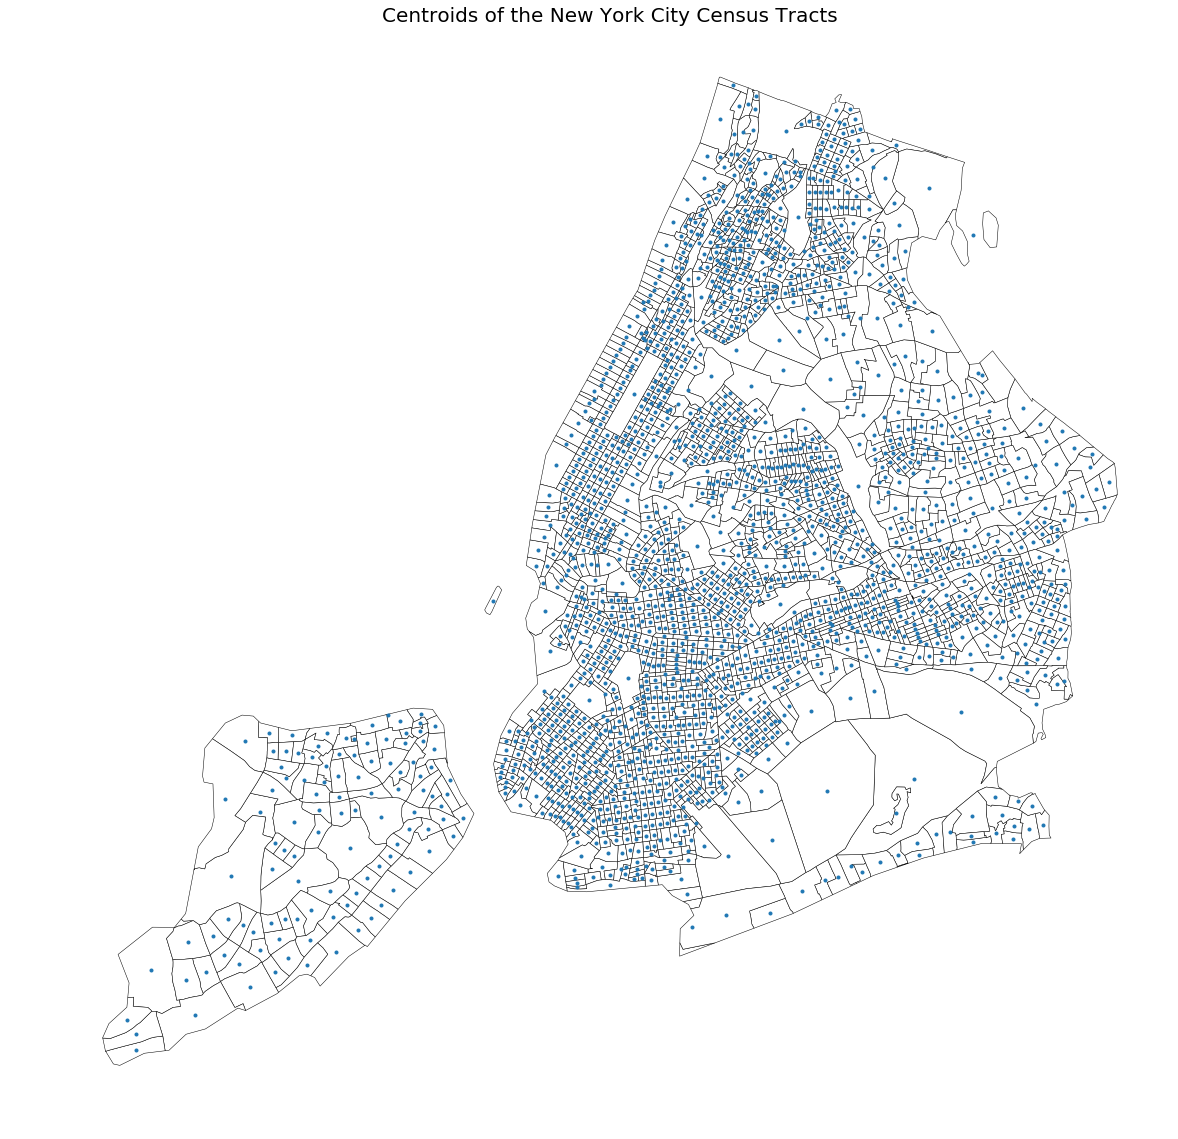

In [12]:
f, ax = plt.subplots(1, figsize=(20, 20))
dataset.plot(ax=ax, linewidth=0.5, color='white', edgecolor='black')
plt.plot(centroids[:,0], centroids[:,1],'.')
plt.title('Centroids of the New York City Census Tracts', fontsize=tfs)
ax.set_axis_off()
plt.show()



## Neighbors
**Neighbors can be defined in many ways, one of the simplest is to take the** 'K-nearest Neighbors' **of each centroid point**

**This is very easy with pysal and shapefiles!**

In [15]:
knn = ps.knnW_from_shapefile(shp_link, k=4)
knn.neighbors

{0: [1083, 1202, 47, 1583],
 1: [1809, 1279, 1128, 721],
 2: [1549, 85, 1803, 66],
 3: [515, 702, 1461, 1902],
 4: [1723, 1255, 809, 594],
 5: [512, 2027, 196, 1225],
 6: [74, 1304, 80, 2029],
 7: [33, 1107, 2026, 816],
 8: [505, 950, 2163, 56],
 9: [225, 763, 489, 1973],
 10: [960, 1103, 1288, 417],
 11: [1933, 246, 1329, 195],
 12: [905, 1528, 1456, 689],
 13: [1295, 1431, 523, 1257],
 14: [316, 1113, 91, 1314],
 15: [1917, 2108, 1530, 886],
 16: [108, 1191, 1228, 915],
 17: [1907, 1987, 117, 686],
 18: [1829, 1279, 651, 1184],
 19: [550, 1301, 478, 147],
 20: [1801, 1338, 298, 519],
 21: [102, 1412, 1976, 1868],
 22: [57, 2020, 1183, 402],
 23: [529, 1754, 1744, 977],
 24: [751, 442, 1414, 249],
 25: [1589, 196, 1836, 2144],
 26: [526, 1948, 2151, 1740],
 27: [377, 496, 67, 765],
 28: [755, 1273, 2005, 180],
 29: [2067, 253, 791, 545],
 30: [1510, 312, 1547, 873],
 31: [1999, 2052, 1696, 133],
 32: [569, 1248, 1070, 1019],
 33: [7, 1533, 959, 714],
 34: [2066, 1366, 663, 252],
 35: 

**To test this, we can take a single point, and link this with its neighbors**

In [17]:
self_and_neighbors = [0]
self_and_neighbors.extend(knn.neighbors[0])
print(self_and_neighbors)
dataset.loc[self_and_neighbors]



[0, 1083, 1202, 47, 1583]


geom_id    id  county  tract  \
0        2120  2679      47  21700   
1083     2121  2681      47  21900   
1202     2118  2677      47  21500   
47       2117  2675      47  21300   
1583     1796  2765      47  30500   

                                               geom_gps  locations_  \
0     SRID=4326;MULTIPOLYGON(((-73.957802 40.674398,...        31.0   
1083  SRID=4326;MULTIPOLYGON(((-73.953019 40.672681,...        47.0   
1202  SRID=4326;MULTIPOLYGON(((-73.961029 40.672244,...        35.0   
47    SRID=4326;MULTIPOLYGON(((-73.960337 40.664108,...        50.0   
1583  SRID=4326;MULTIPOLYGON(((-73.957802 40.674398,...        64.0   

      incidents_  incident_1  larcenies_  robberies_  \
0          994.0       523.0       213.0       115.0   
1083      1058.0       559.0       230.0       104.0   
1202       903.0       451.0       171.0       121.0   
47        1261.0       618.0       240.0       161.0   
1583      1156.0       613.0       184.0       100.0   

                            ...                          mta_we_mor  \
0                           ...                                   f   
1083                        ...                                   f   
1202                        ...                                       
47                          ...                                   f   
1583                        ...                                   t   

      mta_week_m  max_qscore  min_qscore  avg_qscore  count_list  max_listin  \
0              t   40.682350   13.852578   26.418264        51.0       220.0   
1083           t   40.647514   17.208078   28.091819        66.0       225.0   
1202               37.892654   18.491983   26.732454        77.0       250.0   
47             t   38.817543   13.898661   25.298768        24.0       250.0   
1583           t   37.939461   12.207931   23.336688       117.0       300.0   

      min_listin  avg_listin  \
0           35.0   97.862745   
1083        31.0   89.530303   
1202        40.0  114.194805   
47          32.0  110.166667   
1583        35.0  104.444444   

                                               geometry  
0     POLYGON ((995955.1892620423 184980.6033229793,...  
1083  POLYGON ((997282.2680967433 184355.726658182, ...  
1202  POLYGON ((995060.409640542 184195.4250231786, ...  
47    POLYGON ((995253.7099830509 181231.3363708049,...  
1583  POLYGON ((995955.1892620423 184980.6033229793,...  

[5 rows x 188 columns]

**Lets use one of the predefined functions to visualise this to check how the linking looks**

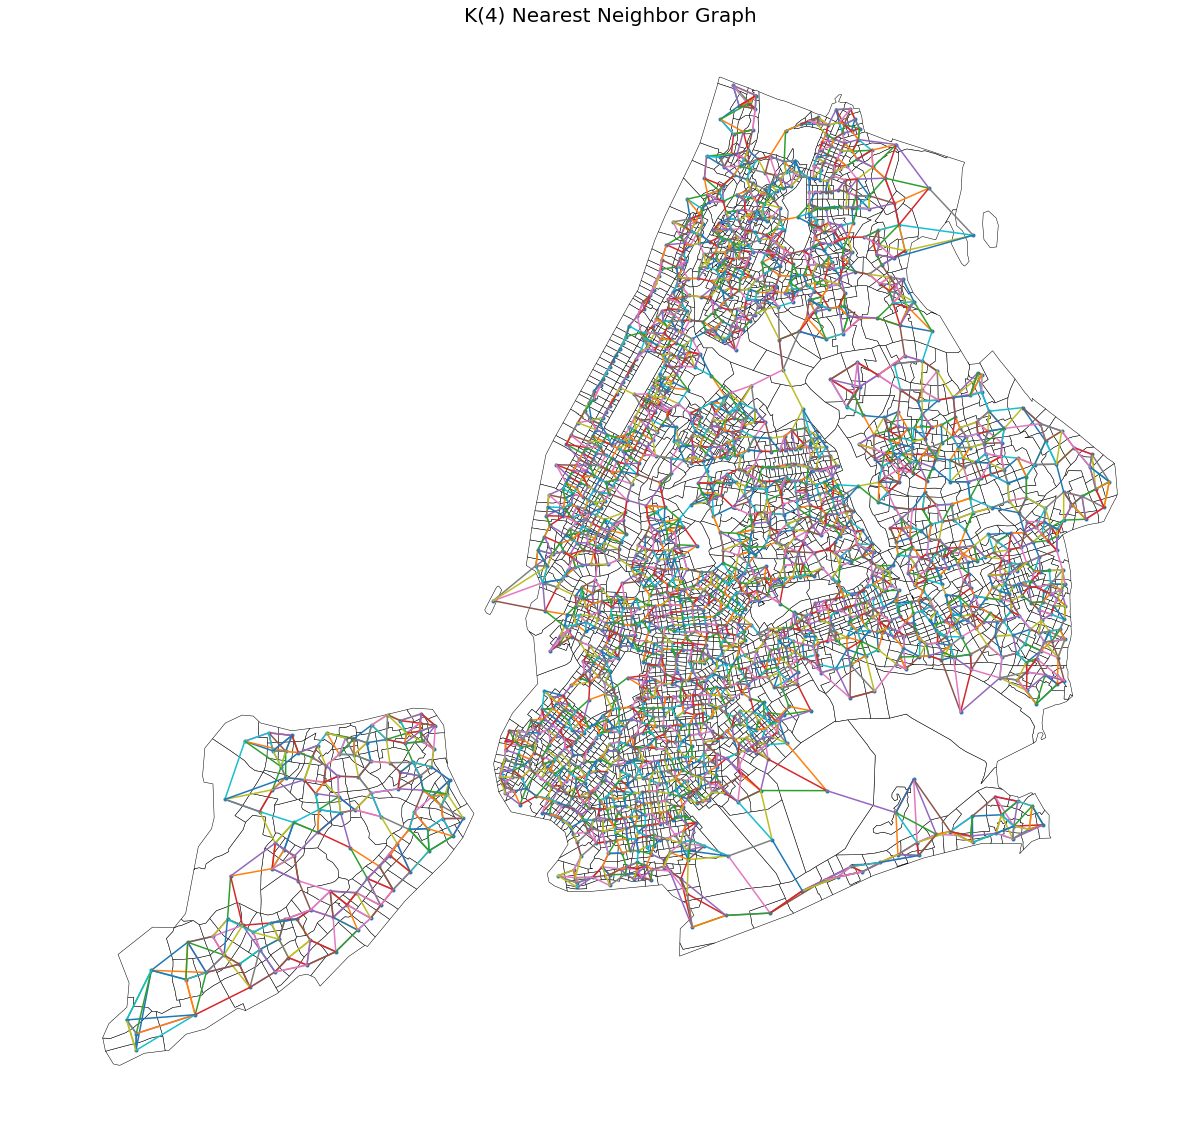

In [18]:
plotNeighborGraph('K(4) Nearest Neighbor Graph', knn)

**There are clearly some issues with this approach**

**Other techniques are more suitable when the map data is available**

**Queens Neighbors are those that share an edge OR a corner, and can also be easily generated from shapefiles** 

In [ ]:
qW = ps.queen_from_shapefile(shp_link)
plotNeighborGraph('Queen Nearest Neighbor Graph', qw)


**This is much better, but perhaps overkill for our problem right now.**

**Especially as US census tracts are often 'grid' based.**

** Rook Neighbors are similar to Queens, but link only via edges (and not corners)**

**.. and can be generated in the same way as before**

/Users/bryder/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:186: UserWarning: There is one disconnected observation (no neighbors)
  warnings.warn("There is one disconnected observation (no neighbors)")
/Users/bryder/anaconda3/lib/python3.6/site-packages/pysal/weights/weights.py:187: UserWarning: Island id: 241
  warnings.warn("Island id: %s" % str(self.islands[0]))


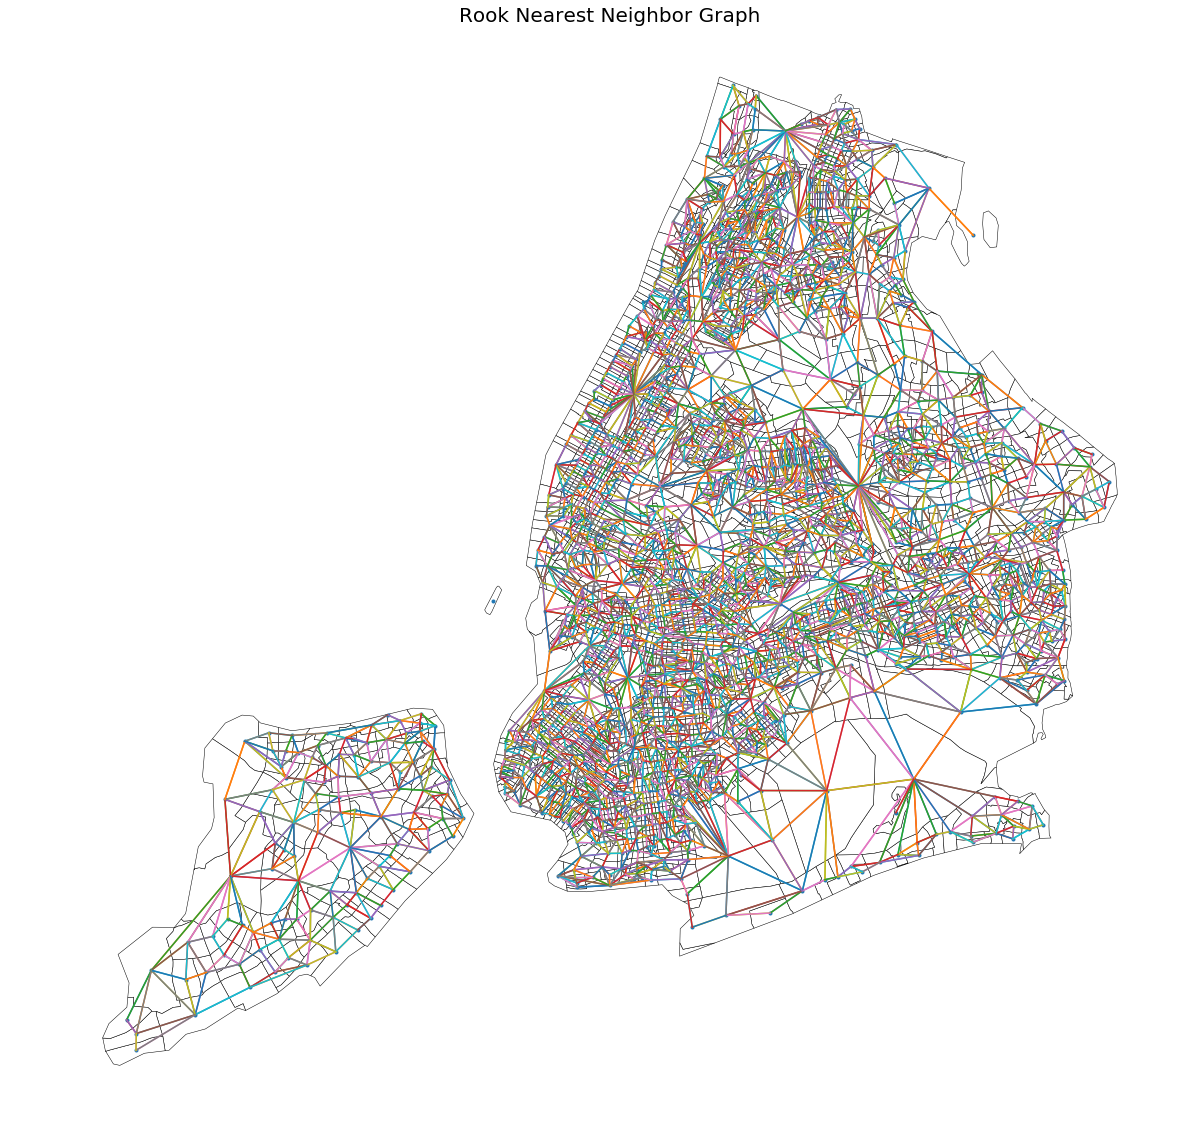

In [20]:
rW = ps.rook_from_shapefile(shp_link)
plotNeighborGraph('Rook Nearest Neighbor Graph', rW)


## Visualising the data

** So we have some neighbors, but what are we actually investigating here**

** Average AirBnB listing price in New York Census Tracts**

** Lets add this to our map!**

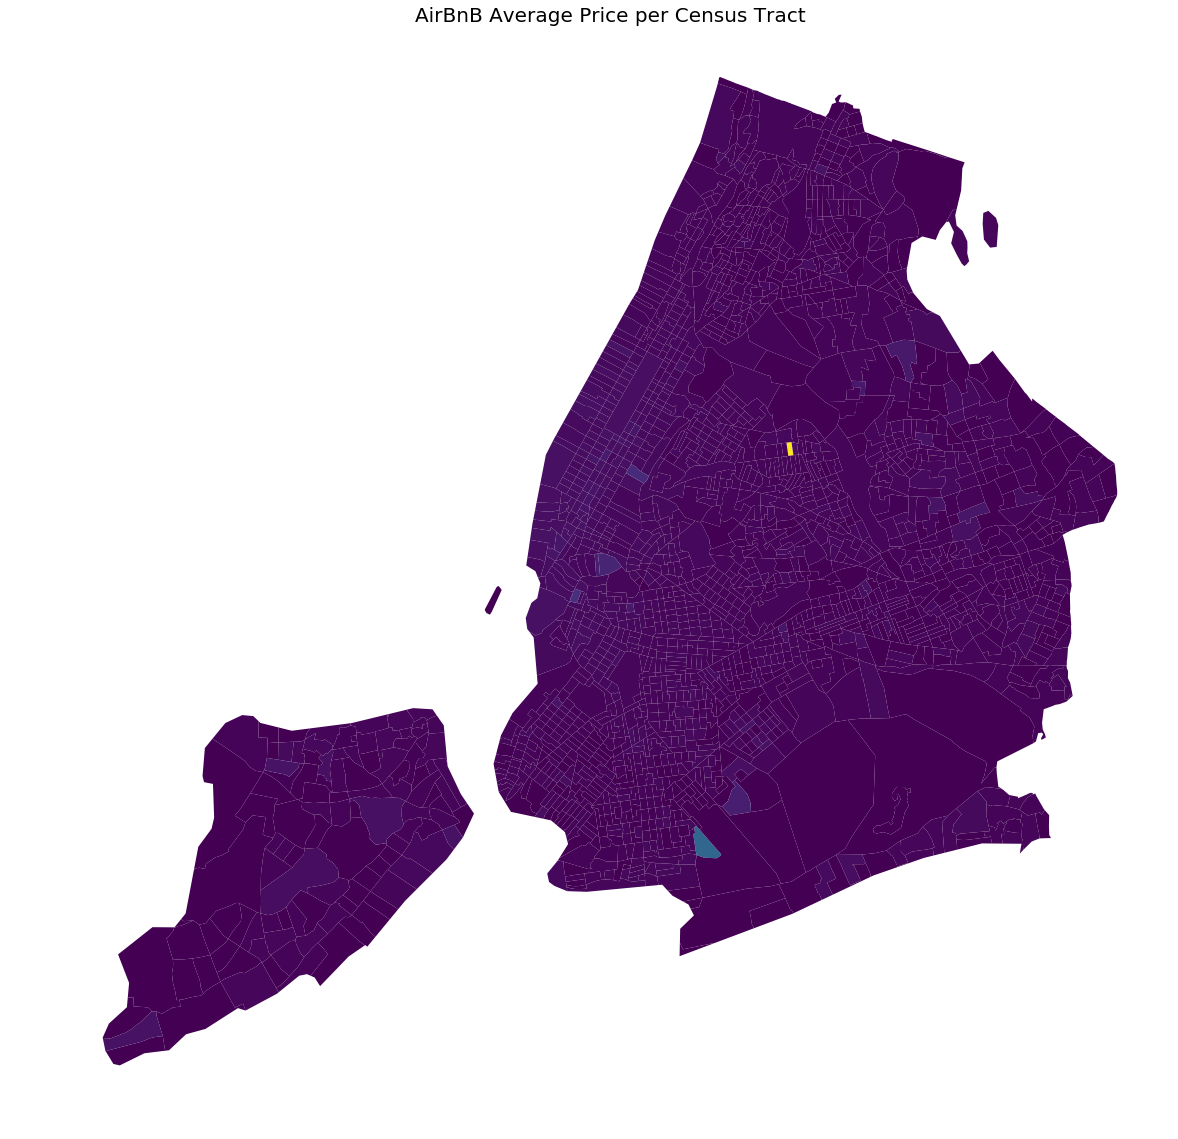

In [21]:
f, ax = plt.subplots(1, figsize=(20, 20))
dataset.plot(ax=ax, linewidth=0.5, column='avg_listin')
plt.title('AirBnB Average Price per Census Tract', fontsize=tfs)
ax.set_axis_off()
plt.show()

**Interesting, but not so useful for us to interpret really**

**We should take a closer look at the data**

{'boxes': [<matplotlib.lines.Line2D at 0x1a3479dc88>],
 'caps': [<matplotlib.lines.Line2D at 0x1a34795a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a34db2978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a34db23c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a3479def0>,
  <matplotlib.lines.Line2D at 0x1a34795470>]}

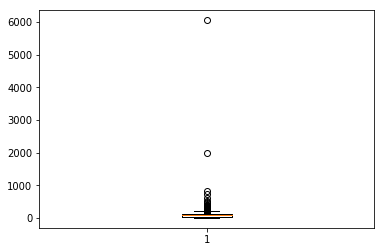

In [23]:
plt.boxplot(dataset.avg_listin, showfliers=True)

**There are some clear outliers**

{'boxes': [<matplotlib.lines.Line2D at 0x1a22c99400>],
 'caps': [<matplotlib.lines.Line2D at 0x1a22187048>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a346632e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a22fd5198>,
  <matplotlib.lines.Line2D at 0x1a223fb7f0>]}

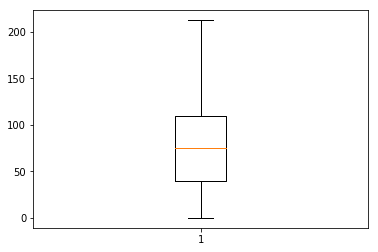

In [30]:

plt.boxplot(dataset.avg_listin.dropna(), showfliers=False)

**We can manage these outliers by calculating the quantiles of the data, and help us see patterns in the data**

(array([ 483.,  109.,  202.,  191.,  197.,  199.,  195.,  198.,  196.,  197.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

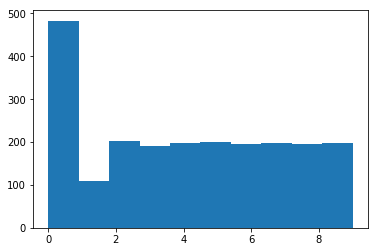

In [25]:
bin_n = 10
quantiles = ps.Quantiles(dataset.avg_listin, k=bin_n+1)
plt.hist(quantiles.yb)

**Let's see if this helps us interpret the data more easily..**

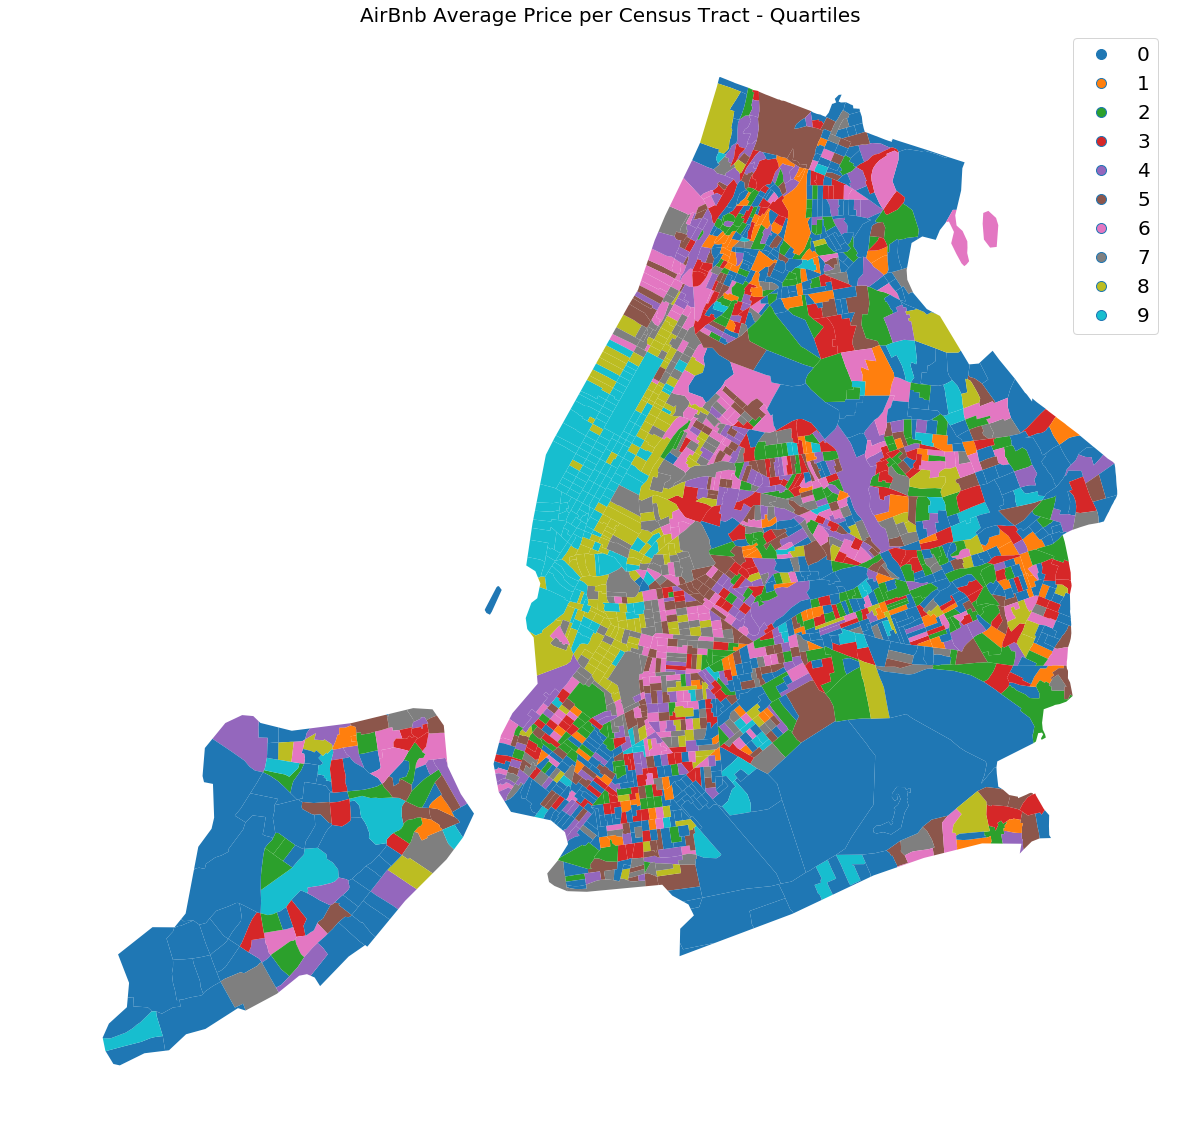

In [26]:
f, ax = plt.subplots(1, figsize=(20, 20))

dataset.assign(avg_listin_QT=quantiles.yb).plot( ax=ax, linewidth=0.5, column='avg_listin_QT', categorical=True, legend=True)



plt.title('AirBnb Average Price per Census Tract - Quartiles', fontsize=tfs)
ax.set_axis_off()
plt.show()

**Interesting, but still not very intuitive or easy to interpret**

** Color maps can be found at following link: **
https://matplotlib.org/examples/color/colormaps_reference.html

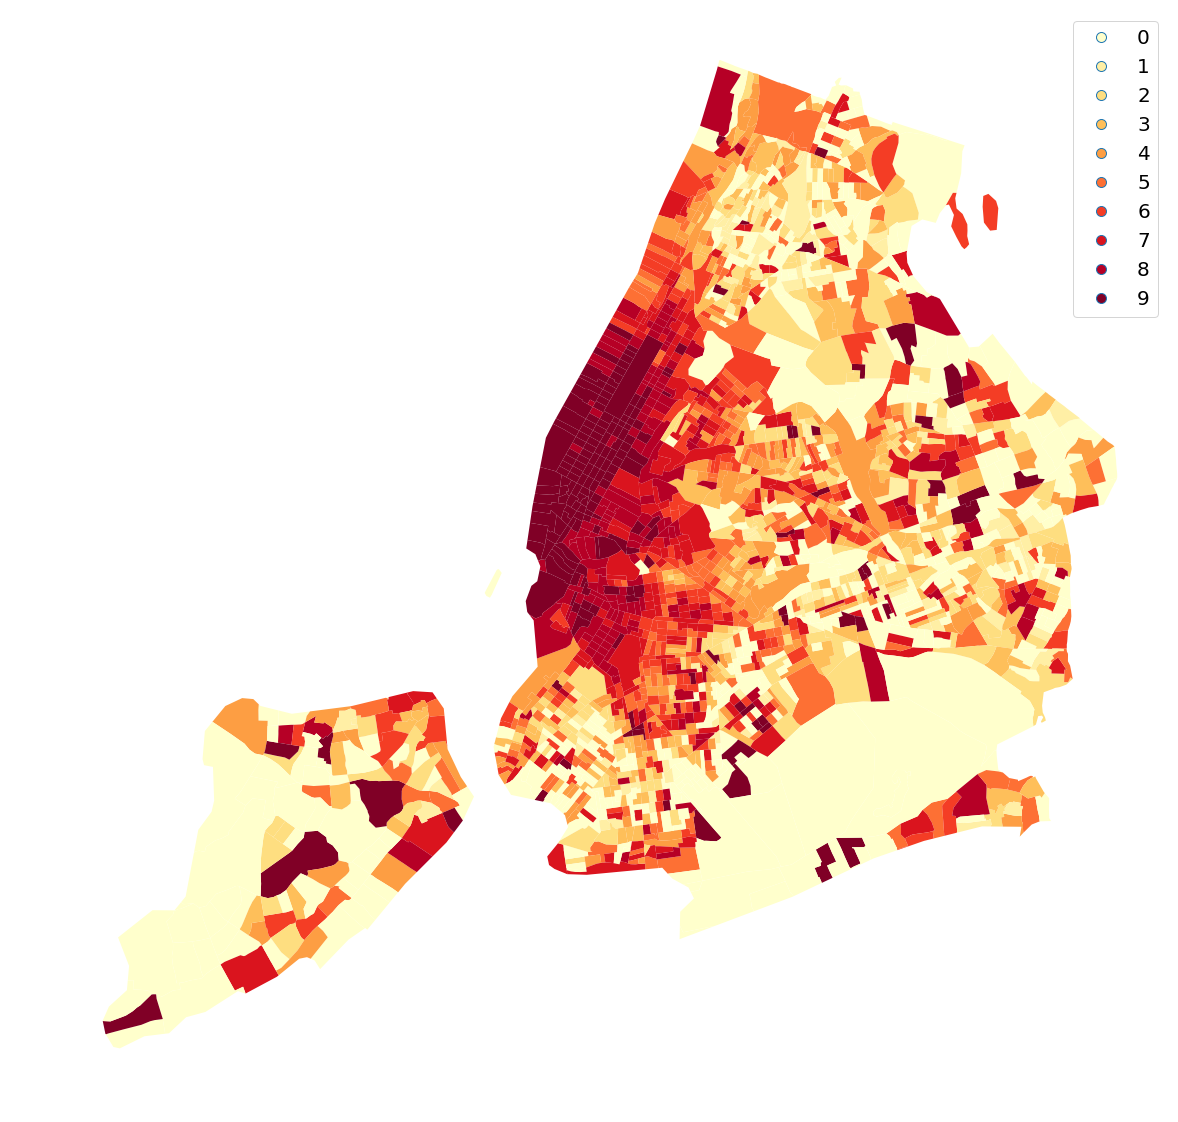

In [29]:
f, ax = plt.subplots(1, figsize=(20, 20))

dataset.assign(avg_listin_QT=quantiles.yb).plot( ax=ax,
                                                linewidth=0.5, 
                                                column='avg_listin_QT', 
                                                categorical=True, 
                                                legend=True,
                                               cmap='YlOrRd')


plt.title('', fontsize=tfs)
ax.set_axis_off()
plt.show()

## Regressions

**We can 'see' some spatial patterns in the data, so let's get down to the regression business** 

** First step: Normalising our dependent variable**

In [31]:
name_y = ['avg_listin']
y = dataset.loc[:, name_y]
ln_y = np.log(y + 1)
transformed_y =  ln_y - mean(ln_y)

# An alternative is to use the BoxCox transformation, uncomment the line below to apply this instead
#transformed_y = analyse_and_transform_wrapper(name_y,y)

**We'll use the Rook Neighbors weighting from before**

**The weights have to be transformed into rows in order to be used...**

**... and then use the pysal spatial lag function with the weights and our dependent variable**

In [32]:
rW.transform = 'r'
transformed_y_lag = ps.lag_spatial(rW, transformed_y)

('WARNING: ', 241, ' is an island (no neighbors)')


**Let's see what these lag values look like!**

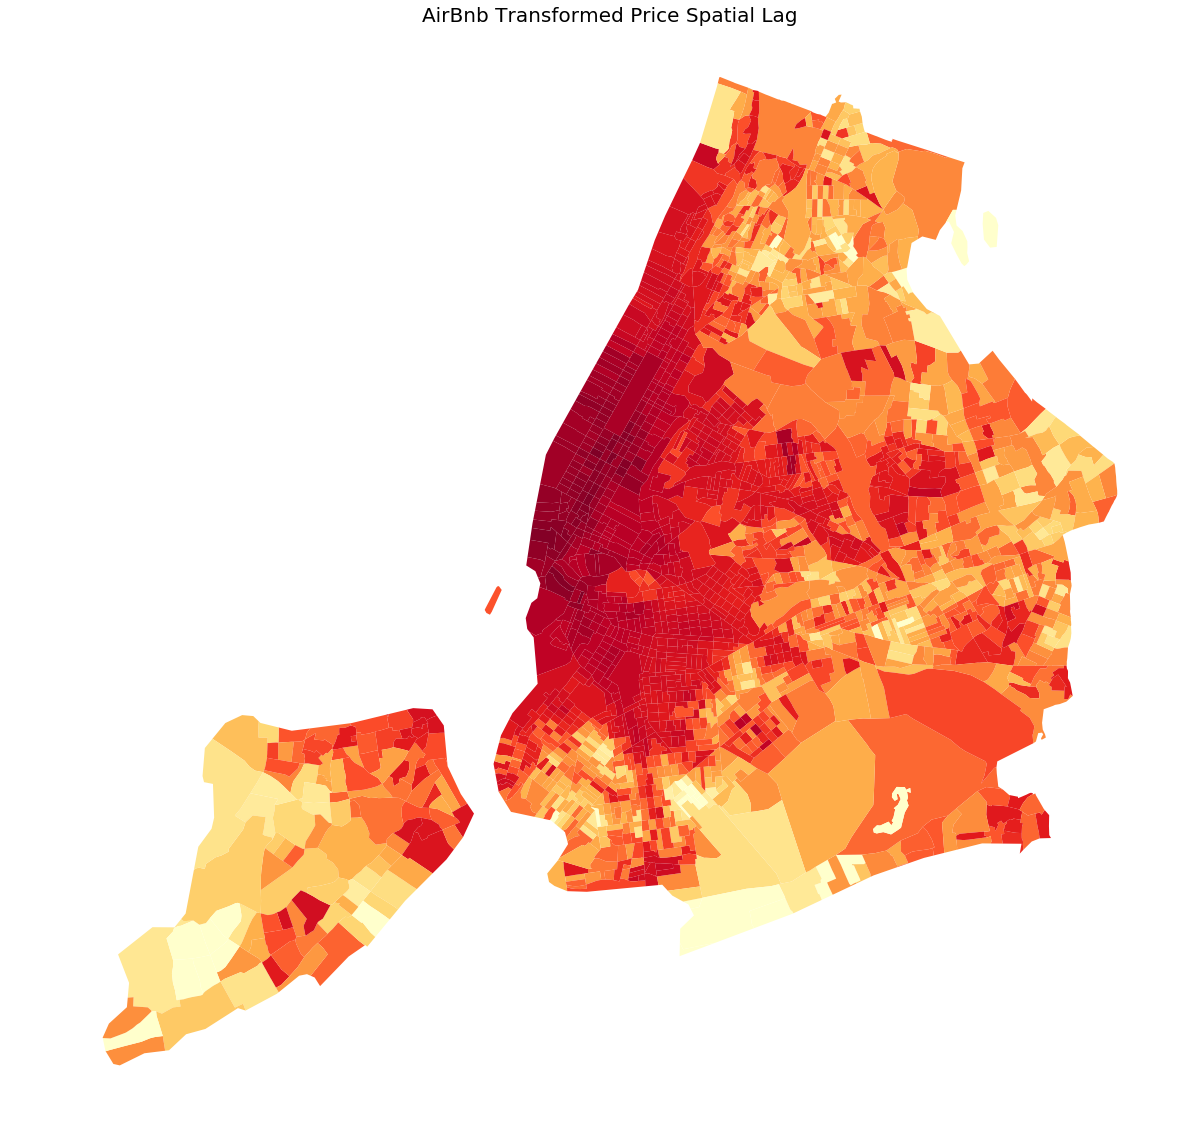

In [33]:
f, ax = plt.subplots(1, figsize=(20, 20))
dataset.assign( transformed_y_lag=transformed_y_lag ).plot(ax=ax , \
                                                         linewidth=0.5 , \
                                                         column='transformed_y_lag' , \
                                                         cmap='YlOrRd' )

plt.title('AirBnb Transformed Price Spatial Lag', fontsize=tfs)
ax.set_axis_off()
plt.show()

**In PySAL, commonly-used analysis methods are very easy to access. **

**For example, we can quickly compute a Moran's I statistic for price**

In [35]:
MI_transformed_y = ps.Moran(transformed_y,rW)
MI_transformed_y.I, MI_transformed_y.p_sim

(0.31584717131054596, 0.001)

**We can plot this and see the relationship between the price and the surrounding lagged price** 

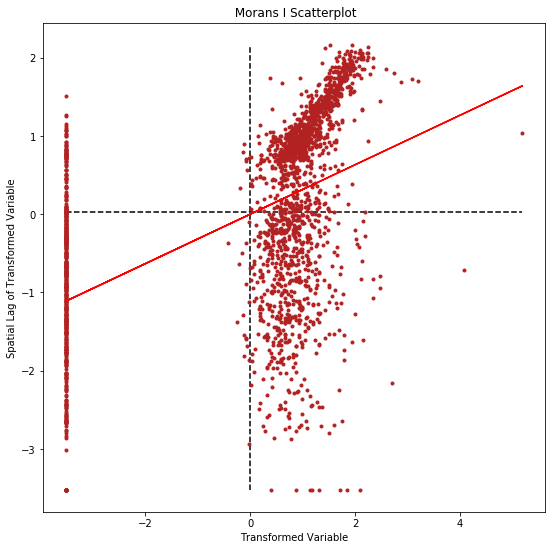

In [37]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot( transformed_y.values, transformed_y_lag , '.', color='firebrick')

plt.vlines(transformed_y.mean(), transformed_y_lag.min(), transformed_y_lag.max(), linestyle='--')
plt.hlines(transformed_y_lag.mean(), transformed_y.min(), transformed_y.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(transformed_y.values, MI_transformed_y.I*transformed_y.values, 'r')

plt.title(' Morans I Scatterplot')
plt.ylabel('Spatial Lag of Transformed Variable')
plt.xlabel('Transformed Variable')
plt.show()


**Lets grab some independent variables...**

-0.0175185062442
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 10.54420136   8.25430796   7.57813721 ...,   4.86746324   7.12485676   0.        ]
[ 1.26049429 -0.26369089 -0.71375963 ..., -2.51802227 -1.01546946
 -5.7578741 ]
X
number of instances:  2167
minimum:  0.0
Q1:  4097.0
median:  10477.0
mean:  70383.5126904
Q3:  31130.5
maximum:  2569036.0
standard deviation:  215290.74067
skewness:  5.609771212143012


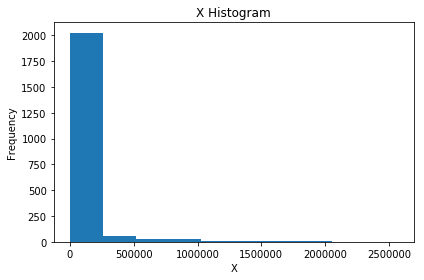

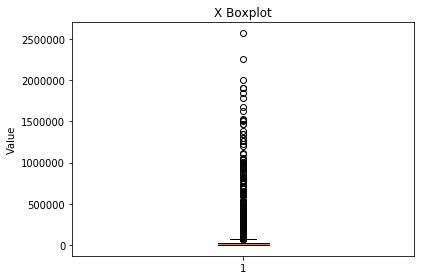

X Standardized
number of instances:  2167
minimum:  -0.326923083043
Q1:  -0.307893003127
median:  -0.278258658519
mean:  -6.55784712284e-18
Q3:  -0.182325596392
maximum:  11.6059449632
standard deviation:  1.0
skewness:  5.609771212143011


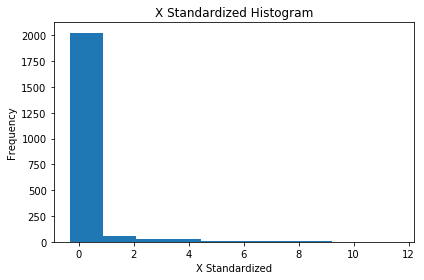

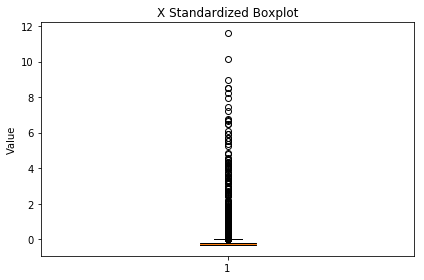

X Transformed
number of instances:  2167
minimum:  0.0
Q1:  7.74056966256
median:  8.54541130671
mean:  8.65046981532
Q3:  9.46255968624
maximum:  13.0053606846
standard deviation:  1.50237217187
skewness:  -0.017779477310606594


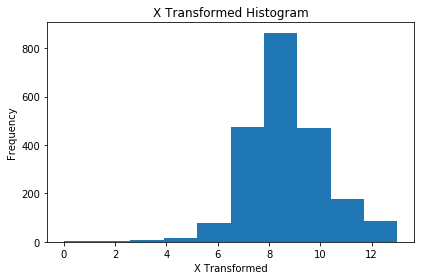

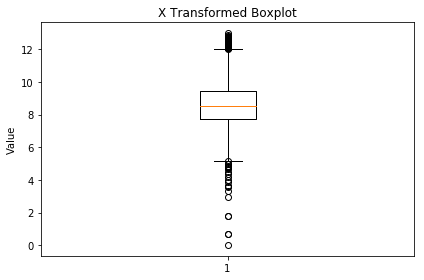

X Transformed Standardized
number of instances:  2167
minimum:  -5.7578740989
Q1:  -0.605642310071
median:  -0.0699284175912
mean:  8.91867208707e-16
Q3:  0.540538413935
maximum:  2.89867647368
standard deviation:  1.0
skewness:  -0.017779477310609238


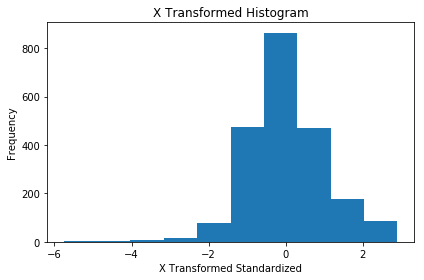

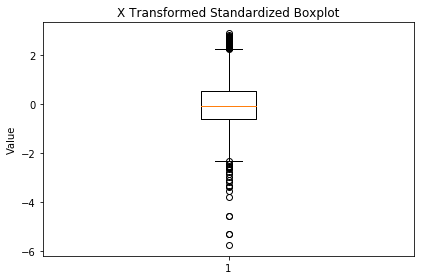

0.455999697074
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 370.49896213  415.93410149  234.0604375  ...,  307.14128031  293.37767247
    0.        ]
[ 0.92650305  1.36232109 -0.38222781 ...,  0.31877035  0.18674856
 -2.62735704]
X
number of instances:  2167
minimum:  0.0
Q1:  22524.58
median:  40406.37
mean:  47741.7417859
Q3:  63726.675
maximum:  230138.45
standard deviation:  34972.4186335
skewness:  1.228204412995593


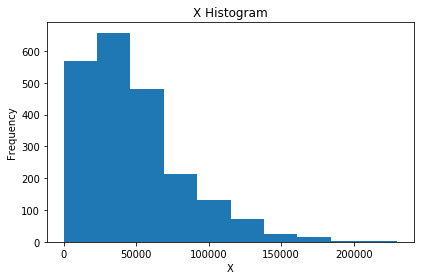

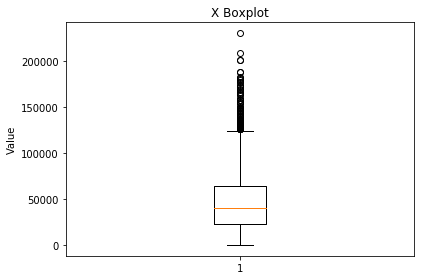

X Standardized
number of instances:  2167
minimum:  -1.36512553753
Q1:  -0.721058559035
median:  -0.209747340118
mean:  3.27892356142e-17
Q3:  0.457072568575
maximum:  5.21544449429
standard deviation:  1.0
skewness:  1.2282044129955931


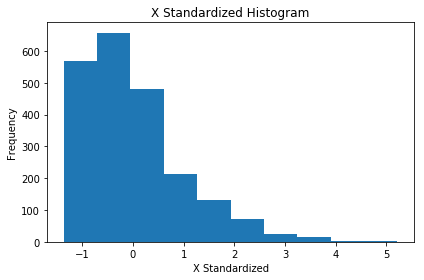

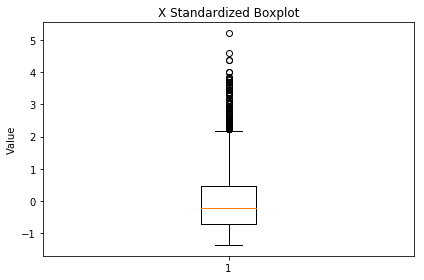

X Transformed
number of instances:  2167
minimum:  0.0
Q1:  209.572109641
median:  274.233771945
mean:  273.908660048
Q3:  338.064405232
maximum:  608.892193983
standard deviation:  104.252545798
skewness:  -0.11081033219083405


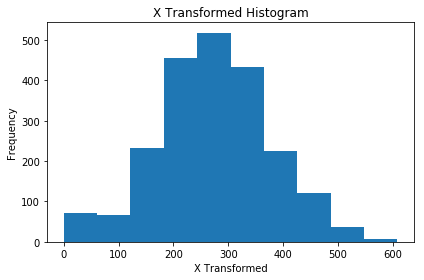

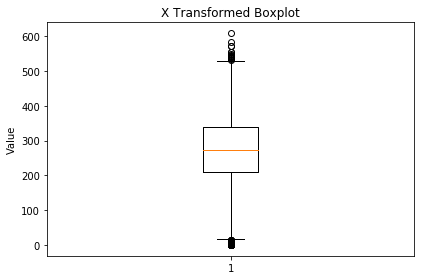

X Transformed Standardized
number of instances:  2167
minimum:  -2.62735703912
Q1:  -0.617122103972
median:  0.00311850318905
mean:  4.42654680792e-16
Q3:  0.615387803652
maximum:  3.21319284216
standard deviation:  1.0
skewness:  -0.11081033219083544


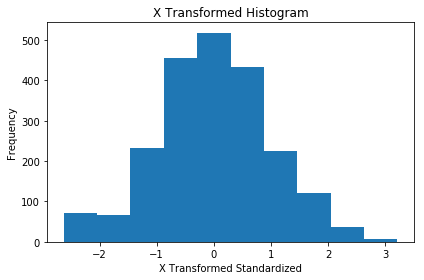

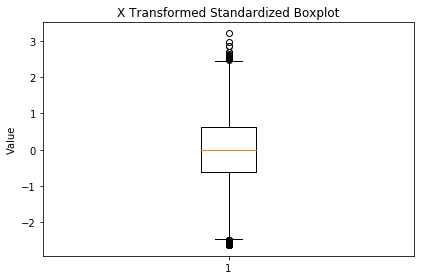

3.88691452936
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 99984.41388648  88384.47477993  84687.339447   ...,  88883.34296484
  94393.10084026      0.        ]
[ 0.45684471  0.00854931 -0.1343315  ...,  0.02782875  0.24076083
 -3.40718869]
X
number of instances:  2167
minimum:  0.0
Q1:  24.3067453886
median:  25.6655802029
mean:  25.1034646174
Q3:  26.7736708292
maximum:  30.3177361681
standard deviation:  3.44942016269
skewness:  -4.797846730799624


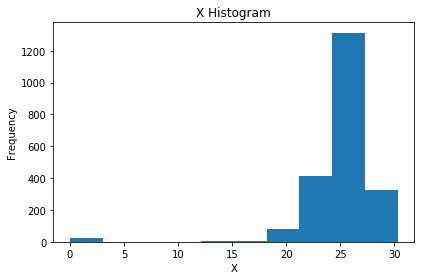

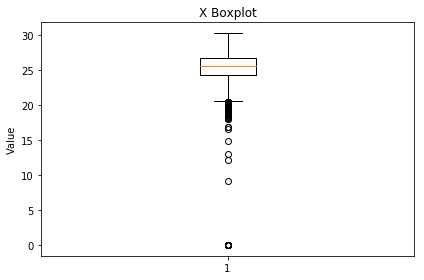

X Standardized
number of instances:  2167
minimum:  -7.27758969144
Q1:  -0.230971928987
median:  0.162959442156
mean:  -4.91838534213e-17
Q3:  0.484199121308
maximum:  1.51163711719
standard deviation:  1.0
skewness:  -4.797846730799622


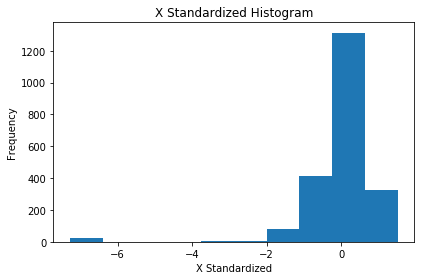

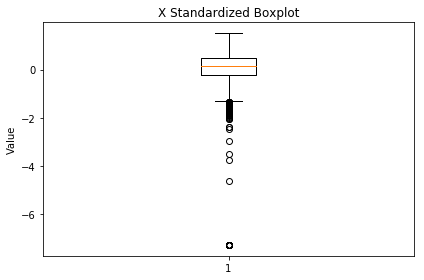

X Transformed
number of instances:  2167
minimum:  0.0
Q1:  73223.9318609
median:  89731.2195958
mean:  88163.255615
Q3:  105117.048651
maximum:  167650.027972
standard deviation:  25875.6598846
skewness:  -0.5102002099745198


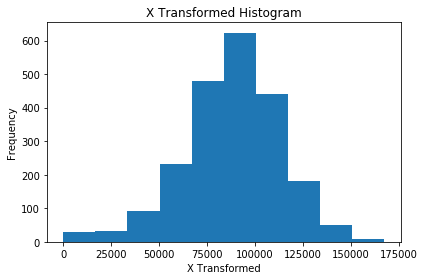

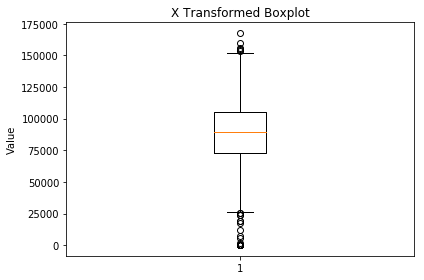

X Transformed Standardized
number of instances:  2167
minimum:  -3.40718868652
Q1:  -0.577350445197
median:  0.060596096399
mean:  -5.90206241056e-17
Q3:  0.655202345038
maximum:  3.07187421351
standard deviation:  1.0
skewness:  -0.5102002099745199


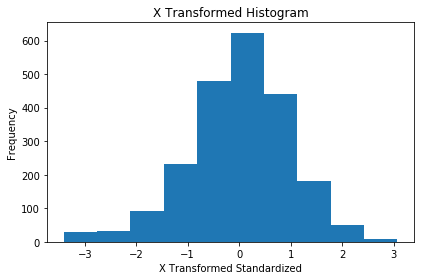

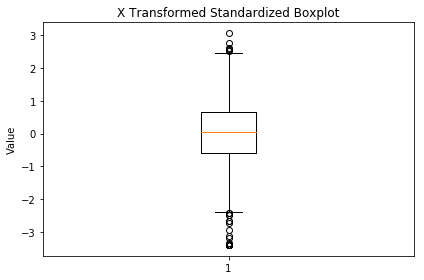

0.23595524433
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 17.36532486  16.76509727  11.40055797 ...,  10.0785022   15.14962473   0.        ]
[ 0.69270621  0.51999337 -1.02362909 ..., -1.40404479  0.05514829
 -4.30408924]
X
number of instances:  2167
minimum:  0.0
Q1:  342.0
median:  566.0
mean:  744.047069682
Q3:  970.5
maximum:  7894.0
standard deviation:  619.237192147
skewness:  3.2845790137901116


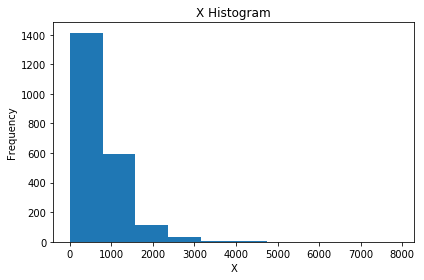

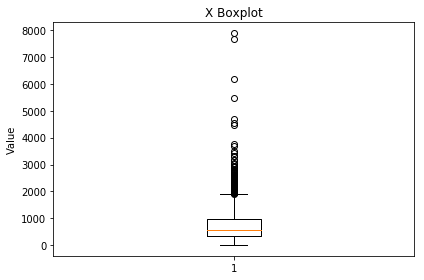

X Standardized
number of instances:  2167
minimum:  -1.20155423337
Q1:  -0.649261825324
median:  -0.287526446957
mean:  -8.19730890355e-18
Q3:  0.36569659121
maximum:  11.5463880739
standard deviation:  1.0
skewness:  3.284579013790111


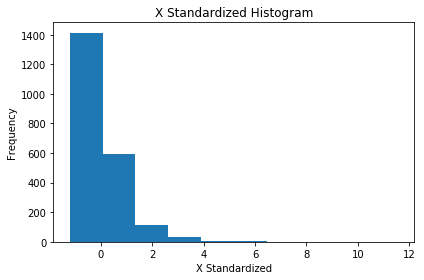

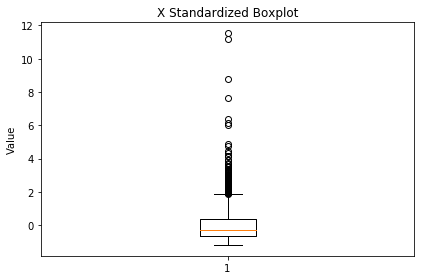

X Transformed
number of instances:  2167
minimum:  0.0
Q1:  12.5648880905
median:  14.680670807
mean:  14.9579682925
Q3:  17.2438309749
maximum:  30.9804232106
standard deviation:  3.47529232028
skewness:  0.10620190420838423


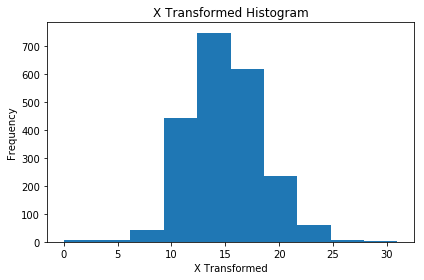

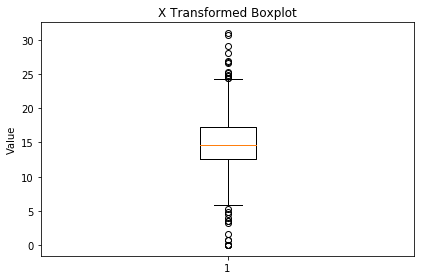

X Transformed Standardized
number of instances:  2167
minimum:  -4.30408924313
Q1:  -0.688598247697
median:  -0.0797911254495
mean:  -1.00007168623e-16
Q3:  0.657746880487
maximum:  4.6103905633
standard deviation:  1.0
skewness:  0.10620190420838428


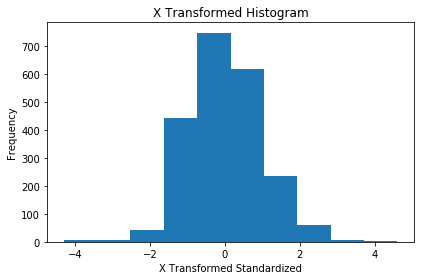

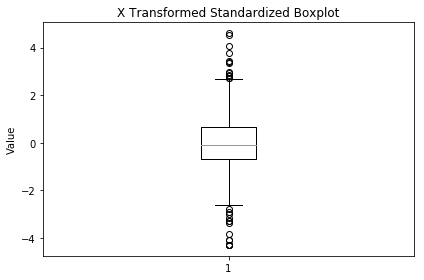

In [39]:
name_x = ['checkins_t','population','avg_qscore','incidents_']
x = dataset.loc[:, name_x]
transformed_x = analyse_and_transform_wrapper(name_x, x)

**To run the model, we can use the spreg module in PySAL, which implements a standard OLS routine, but is particularly well suited for regressions on spatial data. Also, although for the initial model we do not need it, let us build a spatial weights matrix that connects every observation to its 8 nearest neighbors. This will allow us to get extra diagnostics from the baseline model.**

In [40]:
model_ols = ps.spreg.OLS(y=transformed_y.values , \
                         x=transformed_x.values , \
                         w=rW , \
                         name_y='transformed_average_price' , \
                         name_x=name_x , \
                         spat_diag=True )
print(model_ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :transformed_average_price                Number of Observations:        2167
Mean dependent var  :      0.0000                Number of Variables   :           5
S.D. dependent var  :      1.9382                Degrees of Freedom    :        2162
R-squared           :      0.1758
Adjusted R-squared  :      0.1742
Sum squared residual:    6706.641                F-statistic           :    115.2479
Sigma-square        :       3.102                Prob(F-statistic)     :   3.472e-89
S.E. of regression  :       1.761                Log likelihood        :   -4298.929
Sigma-square ML     :       3.095                Akaike info criterion :    8607.858
S.E of regression ML:      1.7592                Schwarz criterion     :    8636.263

----------------------------------------------------------------

**If we include the lagged prices of the neighbors in the model, we violate some of the assumptions on which OLS relies. **

**We can use GM_lag to account for this and include these spatially lagged varibles**

In [42]:
model_lag = ps.spreg.GM_Lag(y=transformed_y.values, \
                            x=transformed_x.values, \
                            w=rW, \
                            name_y='transformed_average_price', \
                            name_x=name_x)
print(model_lag.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :transformed_average_price                Number of Observations:        2167
Mean dependent var  :      0.0000                Number of Variables   :           6
S.D. dependent var  :      1.9382                Degrees of Freedom    :        2161
Pseudo R-squared    :      0.2737
Spatial Pseudo R-squared:  0.1940

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      -0.0184307       0.0355661      -0.5182100       0.6043118
          checkins_t       0.2846635       0.0589604       4.8280455       0.0000014
          population       0.0522669       0.0

**There are several over spatial regression methods built into PySAL**

**Spatial Error is when the error values in the models are spatially lagged**

In [43]:
model_error = ps.spreg.GM_Error(y=transformed_y.values, \
                            x=transformed_x.values, \
                            w=rW, \
                            name_y='transformed_average_price', \
                            name_x=name_x)
print(model_error.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :transformed_average_price                Number of Observations:        2167
Mean dependent var  :      0.0000                Number of Variables   :           5
S.D. dependent var  :      1.9382                Degrees of Freedom    :        2162
Pseudo R-squared    :      0.1742

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      -0.0034066       0.0548392      -0.0621196       0.9504676
          checkins_t       0.4554568       0.0533285       8.5405973       0.0000000
          population       0.1440747       0.0501249       2.8743169       0.0

**Spatial Combo is when both the dependent variable and the error values in the models are spatially lagged**

In [44]:
model_combo = ps.spreg.GM_Combo(y=transformed_y.values, \
                            x=transformed_x.values, \
                            w=rW, \
                            name_y='transformed_average_price', \
                            name_x=name_x)
print(model_combo.summary)


REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES
-------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :transformed_average_price                Number of Observations:        2167
Mean dependent var  :      0.0000                Number of Variables   :           6
S.D. dependent var  :      1.9382                Degrees of Freedom    :        2161
Pseudo R-squared    :      0.2733
Spatial Pseudo R-squared:  0.1976

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      -0.0142675       0.0257820      -0.5533902       0.5799963
          checkins_t       0.2911401       0.0555137       5.2444738       0.0000002
          population    

**Interested in trying out some other regressions? Here's a list of the variables in the dataset**
*Refer to the powerpoint for a complete list of the full names*.

In [45]:
dataset.columns.tolist()

['geom_id',
 'id',
 'county',
 'tract',
 'geom_gps',
 'locations_',
 'incidents_',
 'incident_1',
 'larcenies_',
 'robberies_',
 'burglaries',
 'assaults_2',
 'vehicles_2',
 'murders_20',
 'rapes_2011',
 'incident_2',
 'incident_3',
 'larcenie_1',
 'robberie_1',
 'burglari_1',
 'assaults_1',
 'vehicles_1',
 'murders__1',
 'rapes_20_1',
 'incident_4',
 'incident_5',
 'larcenie_2',
 'robberie_2',
 'burglari_2',
 'assaults_3',
 'vehicles_3',
 'murders__2',
 'rapes_20_2',
 'area',
 'logrecno',
 'population',
 'total_popu',
 'male_popul',
 'male_fract',
 'male_15_34',
 'male_15__1',
 'avg_age',
 'male_avg_a',
 'female_avg',
 'i_mb17',
 'i_m18_34',
 'i_m35_64',
 'i_mo65',
 'i_fb17',
 'i_f18_34',
 'i_f35_64',
 'i_fo65',
 'age_index',
 'black_popu',
 'black_frac',
 'asian_popu',
 'asian_frac',
 'hispanic_p',
 'hispanic_f',
 'i_white',
 'i_black',
 'i_asian',
 'i_other',
 'i_hispanic',
 'racial_eth',
 'total_hous',
 'housing_de',
 'vacant_hou',
 'vacant_fra',
 'rented_hou',
 'rented_fra',
 'avg

## Adding the listing attributes and running the analysis on point level

**We need to import the data from the other shape file**

In [1]:
airbnb_shp_link = "./Data/export.shp"
airbnb_tx =



***Let's check the name and unit of the projection***

In [ ]:
driver = ogr.GetDriverByName('ESRI Shapefile')
shape = driver.Open('./Data/export.shp')
layer= shape.GetLayer()



***Fill in the NAs with zero and visualize the columns*** 

In [ ]:
data = 


**Prepare the dependent variable**

In [ ]:
ybins = 50
plt.hist(data['price'].values, bins=ybins, label='price')
plt.rc('legend', fontsize=20) 
plt.tight_layout()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
plt.clf()
# skewed distribution!


**Prepare the independent variables**

In [ ]:
set(data.bed_type)

In [ ]:
# lets simplify things
data['bedroom_type'] = 

In [ ]:
# census variables (objective)
data['poverty_frac_ts'] =
data['black_frac_ts'] = 
data['hispanic_frac_ts'] = 
data['assaults_ts'] = 
data['rented_frac_ts'] = 

# social media variables (more subjective)
data['venues_index_ts'] = 
data['checkins_ts'] = 
data['avg_qscore_ts'] = 

*** Prepare the right data types for the regressions following ***

In [ ]:
y_final = np.array(data['price_log'])
print(type(y_final))
print(y_final.shape)
y_name = 'log-transformed price'

x_final = data[[
'room_type','accomodate','bathrooms','bedroom_type',
        
'poverty_frac_ts',
'black_frac_ts',
'hispanic_frac_ts',
'assaults_ts',
'rented_frac_ts',
        
'venues_index_ts',  
'checkins_ts',
'avg_qscore_ts',
]]
print(type(x_final))
print(x_final.shape)

cols=x_final.columns.tolist()
feature_names = cols[:]
print('only features: ', feature_names)
print('dependent variable: ', y_name)

** Test correlations of dependent variable with the independent variables **

In [ ]:
## lets have a look at the Pearson correlations to understand whether there are any strong relationships
X = np.array(x_final)
Xy = np.vstack((X.T, np.atleast_2d(y_final)))

correlations = np.corrcoef(Xy)[-1, :]
c = 0 
for feature_name, correlation in zip(feature_names, correlations):
    p = float(sp.stats.pearsonr(X[0:,c], y_final)[1])
    if (p <= 0.001):
        print (c, '{0:>10} {1:+.4f}'.format(feature_name, correlation), '***'.format(p))
    else:
        if (p <= 0.01):
            print (c, '{0:>10} {1:+.4f}'.format(feature_name, correlation), '**'.format(p))
        else:
            if (p <= 0.05):
                print (c, '{0:>10} {1:+.4f}'.format(feature_name, correlation), '*'.format(p))
            else:
                print ('NOT'.format(p), c, '{0:>10} {1:+.4f}'.format(feature_name, correlation))#, '(p={0:+.4f})'.format(p)
    c+=1
print('{0:>10} {1:+.4f}'.format('y', correlations[-1]))

** Build proximity matrix (which kind do we need this time?) **

In [ ]:
airbnbW =

**Test for global spatial auto-correlation**

In [ ]:
I =

**Finally, build the models. Start with simple OLS and diagnostics.**

In [ ]:
airbnb_model_ols = 

***Continue with spatial models (which one?)***

*** Asses prediction performance of spatial models***

In [ ]:
mses =